<a href="https://colab.research.google.com/github/MathalinAK/NLP/blob/main/NLP_Linguistic_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

part of speech

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
  print(token.text,token.lemma_,token.pos_,token.tag_, token.dep_,token.shape_,token.is_alpha,token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN dep xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


morphological feature

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp("I was reading a letter")
token=doc[0]
print(token.morph)
print(token.morph.get("PronType"))

Case=Nom|Number=Sing|Person=1|PronType=Prs
['Prs']


statistical morpholopy

In [ ]:
!python -m spacy download de_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 50.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp=spacy.load("de_core_news_sm")
doc=nlp("wo bist du?")

print(doc)
print(doc[2].morph)
print(doc[2].pos_)

wo bist du?
Case=Nom|Number=Sing|Person=2|PronType=Prs
PRON


rule-based morphology

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
lemmatizer=nlp.get_pipe("lemmatizer")
print(lemmatizer.mode)
doc=nlp("I was reading the paper")
print([token.lemma_ for token in doc])

rule
['I', 'be', 'read', 'the', 'paper']


lookup lemmatizer

In [ ]:
import spacy
nlp=spacy.blank("sv")
nlp.add_pipe("lemmatizer",config={"mode":"lookup"})

Dependency parsing


noun chunks

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
for chunk in doc.noun_chunks:
  print(chunk.text,chunk.root,chunk.root.dep_,chunk.root.head.text)

I I nsubj reading
the paper paper dobj reading


In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp("Autonomous cars shift insurance liability toward manufacturers")
for token in doc:
  print(token.text,token.dep_,token.head.text,token.head.pos_,[child for child in token.children])

Autonomous amod cars NOUN []
cars nsubj shift VERB [Autonomous]
shift ROOT shift VERB [cars, liability, toward]
insurance compound liability NOUN []
liability dobj shift VERB [insurance]
toward prep shift VERB [manufacturers]
manufacturers pobj toward ADP []


In [ ]:
import spacy
from spacy.symbols import nsubj, VERB
nlp=spacy.load("en_core_web_sm")
doc=nlp("Autonomous cars shift insurance liability toward manufacturers")
verbs=set()
for possible_subject in doc:
  if possible_subject.dep==nsubj and possible_subject.head.pos==VERB:
    verbs.add(possible_subject.head)
print(verbs)

{shift}


In [ ]:
verbs = []
for possible_verb in doc:
    if possible_verb.pos == VERB:
        for possible_subject in possible_verb.children:
            if possible_subject.dep == nsubj:
                verbs.append(possible_verb)
                print(verbs)
                break

[shift]


In [ ]:
import spacy
from spacy.symbols import nsubj, VERB
nlp=spacy.load("en_core_web_sm")
doc=nlp("Autonomous cars shift insurance liability toward manufacturers")
verbs=set()
for possible_subject in doc:
  if possible_subject.dep==nsubj and possible_subject.head.pos==VERB:
    verbs.add(possible_subject.head)
print(verbs)

{shift}


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("bright red apples on the tree")
print([token.text for token in doc[2].lefts])  # ['bright','red']
print([token.text for token in doc[2].rights])
print(doc[2].n_lefts)  # 2
print(doc[2].n_rights)  # 1

['bright', 'red']
['on']
2
1


In [ ]:
#The root token for this sentence is "submit", as it is the main verb.
import spacy
nlp=spacy.load("en_core_web_sm")
doc=nlp("credit and mortages account holders must submit their requests")
root = [token for token in doc if token.head == token][0]#. Identifying the Root Token
subject = list(root.lefts)[0]#credit will be display#. Identifying the Subject
for descendant in subject.subtree:
    assert subject is descendant or subject.is_ancestor(descendant)
    print(descendant.text, descendant.dep_, descendant.n_lefts,
            descendant.n_rights,
            [ancestor.text for ancestor in descendant.ancestors])

credit nmod 0 2 ['holders', 'submit']
and cc 0 0 ['credit', 'holders', 'submit']
mortages conj 0 0 ['credit', 'holders', 'submit']
account compound 0 0 ['holders', 'submit']
holders nsubj 2 0 ['submit']


visualizing dependencies

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Autonomous cars shift insurance liability toward manufacturers")
# Since this is an interactive Jupyter environment, we can use displacy.render here
displacy.render(doc, style='dep')
displacy.render(doc, style='ent')

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


named entiti recognition(ner)

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
displacy.render(doc, style='ent')
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


I – Token is inside an entity.
O – Token is outside an entity.
B – Token is the beginning of an entity.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("San Francisco considers banning sidewalk delivery robots")
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print(ents)
# token level
ent = [doc[0].text, doc[0].ent_iob_, doc[0].ent_type_]
print(ent)
ent1 = [doc[1].text, doc[1].ent_iob_, doc[1].ent_type_]
print(ent1)

[('San Francisco', 0, 13, 'GPE')]
['San', 'B', 'GPE']
['Francisco', 'I', 'GPE']


Aligning tokenization

In [ ]:
#In x->y, the lengths show that most other_tokens map to a single spacy_tokens, except for ' and s which map to the same token.
#In y->x, the reverse mapping shows that 's in spacy_tokens maps to two other_tokens.

In [ ]:
from spacy.training import Alignment
other_tokens = ["i", "listened", "to", "obama", "'", "s", "podcasts", "."]
spacy_tokens = ["i", "listened", "to", "obama", "'s", "podcasts", "."]
align = Alignment.from_strings(other_tokens, spacy_tokens)
print(f"a -> b, lengths: {align.x2y.lengths}")
print(f"a -> b, mapping: {align.x2y.data}")  # array : two tokens both refer to "'s"
print(f"b -> a, lengths: {align.y2x.lengths}")  #: the token "'s" refers to two tokens
print(f"b -> a, mappings: {align.y2x.data}")


a -> b, lengths: [1 1 1 1 1 1 1 1]
a -> b, mapping: [0 1 2 3 4 4 5 6]
b -> a, lengths: [1 1 1 1 2 1 1]
b -> a, mappings: [0 1 2 3 4 5 6 7]


In [ ]:
import spacy
from spacy.util import filter_spans  # Import filter_spans from spacy.util
doc = nlp("I live in Berlin Kreuzberg")#doc has 5 items
spans = [doc[3:5], doc[3:4], doc[4:5]]
print(spans)
filtered_spans = filter_spans(spans)
print(filtered_spans)

[Berlin Kreuzberg, Berlin, Kreuzberg]
[Berlin Kreuzberg]


Sentence Segmentation

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence. This is another sentence.")
assert doc.has_annotation("SENT_START")
for sent in doc.sents:
    print(sent.text)

This is a sentence.
This is another sentence.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence. This is another sentence.")
for sent in doc.sents:
    print(sent.text)


This is a sentence.
This is another sentence.


Token-based matching

In [ ]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("HelloWorld", [pattern])
doc = nlp("Hello, world! Hello world!")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world


In [ ]:
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # 'HelloWorld'
    span = doc[start:end]
    print(span)

Hello, world


In [ ]:
from spacy.lang.en import English
from spacy.matcher import PhraseMatcher
nlp = English()
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
patterns = [nlp.make_doc(name) for name in ["Angela Merkel", "Barack Obama"]]
matcher.add("Names", patterns)
doc = nlp("angela merkel and us president barack Obama")
for match_id, start, end in matcher(doc):#the name start is angela merkel and it end in barak obama
    print("Matched text:", doc[start:end])


Matched text: angela merkel
Matched text: barack Obama


In [ ]:
import spacy

In [ ]:
nlp=spacy.load("en_core_web_sm")
doc=nlp("I live in New York."
        "the match id is the same.")
text=doc.text
print(text)
for token in doc:
  print(token.text)
for token in text:
  print(token)
for doc in doc.sent

I live in New York
I
live
in
New
York
I
 
l
i
v
e
 
i
n
 
N
e
w
 
Y
o
r
k


In [ ]:
doc=nlp("i live in newyork.""it is a favourite place for me")
for sent in doc.sents:
  print(sent)

i live in newyork.it is a favourite place for me


In [ ]:
sentence1 = list(doc.sents)[0]
print (sentence1)


i live in newyork.it is a favourite place for me


In [ ]:
doc1=nlp("apples are good for health")
for token in doc1:
  print("the text :",token.text)
  print("the head :",token.head)#are is the root (main verb)

the text : apples
the head : are
the text : are
the head : are
the text : good
the head : are
the text : for
the head : good
the text : health
the head : for


In [ ]:
token.left_edge#Left edge and right edge are the same because it has no dependent

health

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc1 = nlp("apples are good for health")
for token in doc1:
    print(f"Token: {token.text}")
    print(f"  Head: {token.head.text}")
    print(f"  Left Edge: {token.left_edge.text}")#Left edge and right edge are the same because it has no dependent
    print(f"  Right Edge: {token.right_edge.text}")
    print(f"  lemma: {token.lemma_}")
    print(f"  morph: {token.morph}")

Token: apples
  Head: are
  Left Edge: apples
  Right Edge: apples
  lemma: apple
  morph: Number=Plur
Token: are
  Head: are
  Left Edge: apples
  Right Edge: health
  lemma: be
  morph: Mood=Ind|Tense=Pres|VerbForm=Fin
Token: good
  Head: are
  Left Edge: good
  Right Edge: health
  lemma: good
  morph: Degree=Pos
Token: for
  Head: good
  Left Edge: for
  Right Edge: health
  lemma: for
  morph: 
Token: health
  Head: for
  Left Edge: health
  Right Edge: health
  lemma: health
  morph: Number=Sing


In [ ]:
!python -m spacy download en_core_web_md # Download the medium model if you haven't already


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import numpy as np
your_word = "dog"
ms = nlp.vocab.vectors.most_similar(
    np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), n=10)
words = [nlp.vocab.strings[w] for w in ms[0][0]]
distances = ms[2]
print(words)

['dogsbody', 'wolfdogs', 'Baeg', 'duppy', 'pet(s', 'postcanine', 'Kebira', 'uppies', 'Toropets', 'moggie']


splitting

In [ ]:
import spacy
nlp=spacy.load("en_core_web_sm")
fruit="Apple,banana,orange,mango"
text=fruit.split(",")
for texts in text:
  doc=nlp(fruit)
  print(doc.text)

Apple,banana,orange,mango
Apple,banana,orange,mango
Apple,banana,orange,mango
Apple,banana,orange,mango


In [ ]:
fruits = "apple,banana,orange,grape"
text1 = fruits.split(",")  # Split by comma
for texts in text1:
    doc = nlp(texts)
    print(doc.text)


apple
banana
orange
grape


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Hello, world!")
for token in doc:
    print(token.text, token.idx)#(idx)characterindex

Hello 0
, 5
world 7
! 12


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Hello, world! How are you?")
print("Tokens with punctuation:")
for token in doc:
    if token.is_punct:
        print(token.text)

Tokens with punctuation:
,
!
?


In [ ]:
doc = nlp("Hello, world! How are you?")
# Print tokens that are not punctuation
print("Tokens without punctuation:")
for token in doc:
    if not token.is_punct:
        print(token.text)

Tokens without punctuation:
Hello
world
How
are
you


.text_with_ws prints the token text along with any trailing space, if present.
.is_alpha indicates whether the token consists of alphabetic characters or not.
.is_punct indicates whether the token is a punctuation symbol or not.
.is_stop indicates whether the token is a stop word or not.like the word which has no meaning is, the, and

In [ ]:
doc = nlp("Helloy u, world! How are you1?")
for token in doc:
  print(f"{str(token.text_with_ws):10}"
     f"{str(token.is_alpha):10}"
     f"{str(token.is_punct):10}"
     f"{str(token.is_stop):10}"
 )

Helloy    True      False     False     
u         True      False     False     
,         False     True      False     
world     True      False     False     
!         False     True      False     
How       True      False     True      
are       True      False     True      
you1      False     False     False     
?         False     True      False     


In [ ]:
custom_about_text = (
     "Gus Proto is a Python developer currently"
     " working for a London@based Fintech"
   " company. He is interested in learning"
    " Natural Language Processing."
 )
print([token.text for token in nlp(custom_about_text)[8:15]])#getting them by the index.


['for', 'a', 'London@based', 'Fintech', 'company', '.', 'He']


word frequency


In [ ]:
# import spacy
# from collections import Counter
# nlp = spacy.load("en_core_web_sm")
# text = ("The cat chased the mouse, but the mouse was too quick for the cat")
# doc = nlp(text)
# words = [
#     token.text
#     for token in doc
#     if not token.is_stop and not token.is_punct
#  ]

# print(Counter(words).most_common(5))
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")
text = ("The cat chased the mouse, but the mouse was too quick for the cat")
doc = nlp(text)
words =[token.text for token in doc if not token.is_stop and not token.is_punct]
print(Counter(words).most_common(5))


[('cat', 2), ('mouse', 2), ('chased', 1), ('quick', 1)]


In [ ]:
import spacy
corpus="""A flower!, also known as a bloom or blossom!, is the reproductive structure found in flowering plants!."""

In [ ]:
print(corpus)

A flower!, also known as a bloom or blossom!, is the reproductive structure found in flowering plants!.


In [ ]:
nlp = spacy.blank("en")
sentencizer = nlp.add_pipe("sentencizer")
doc = nlp(corpus)
sentences = list(doc.sents)
for sent in sentences:
    print(sent.text)

A flower!,
also known as a bloom or blossom!,
is the reproductive structure found in flowering plants!.


In [ ]:
#tokenization
##paragraph-->words
##sentence -->words

all the comma are separate words and they are separate together(word are splitted)

convert the sentence into word(wordpunct_tokenize)(word_tokenize)(TreebankTokenizer)-fullstop will not separate as a word in nltk

In [ ]:
doc=nlp(corpus)
tokens=[token.text for token in doc]
print(tokens)

['A', 'flower', '!', ',', 'also', 'known', 'as', 'a', 'bloom', 'or', 'blossom', '!', ',', 'is', 'the', 'reproductive', 'structure', 'found', 'in', 'flowering', 'plants', '!', '.']


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
words = ["eating", "eats", "eaten", "writing", "writes", "programming", "programs"]
for word in words:
    doc = nlp(word)
    print(f"{word} ---------> {doc[0].lemma_}")


eating ---------> eat
eats ---------> eat
eaten ---------> eaten
writing ---------> write
writes ---------> write
programming ---------> programming
programs ---------> program


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
lemmatizer = nlp.get_pipe("lemmatizer")
words = ["eating", "eats", "eaten", "writing", "writes", "programming", "programs"]
for word in words:
    doc = nlp(word)
    lemma = lemmatizer.lemmatize(doc[0])[0]
    print(word + " --------->" + lemma)

eating --------->eat
eats --------->eat
eaten --------->eaten
writing --------->write
writes --------->write
programming --------->programming
programs --------->program


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
sentence = "Taj Mahal is a beautiful monument"
doc = nlp(sentence)
for token in doc:
    print(f"{token.text} -> {token.pos_} ({token.tag_})")


Taj -> PROPN (NNP)
Mahal -> PROPN (NNP)
is -> AUX (VBZ)
a -> DET (DT)
beautiful -> ADJ (JJ)
monument -> NOUN (NN)


In [1]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer#converts a collection of text documents into a bag-of-words representation. It transforms text data into a sparse matrix of token counts(vector)

In [6]:
document=["the quick brown fox","jumps over the lazy dog","the dog barks at the fox"]

In [10]:
#intializing count vectorizer
vectorizer = CountVectorizer()
bow_matrix=vectorizer.fit_transform(document)#transform the learned vocabulary and transform the document into bow matrix
vocab=vectorizer.get_feature_names_out()#get the unique words
print("/n Vocab:")
print(vocab)
print("bow matrix:")
print(bow_matrix.toarray())

/n Vocab:
['at' 'barks' 'brown' 'dog' 'fox' 'jumps' 'lazy' 'over' 'quick' 'the']
bow matrix:
[[0 0 1 0 1 0 0 0 1 1]
 [0 0 0 1 0 1 1 1 0 1]
 [1 1 0 1 1 0 0 0 0 2]]


TF-IDF(term frequency inverse document frequency)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = [
    "The quick brown fox jumps over the lazy dog",
    "The dog barks at the fox",
    "The fox is quick and the dog is lazy"
]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
vocab = vectorizer.get_feature_names_out()
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())
print("\nVocabulary:")
print(vocab)

TF-IDF Matrix:
[[0.         0.         0.         0.40000758 0.23625092 0.23625092
  0.         0.40000758 0.30421607 0.40000758 0.30421607 0.47250184]
 [0.         0.49428908 0.49428908 0.         0.2919351  0.2919351
  0.         0.         0.         0.         0.         0.58387019]
 [0.34816031 0.         0.         0.         0.20562909 0.20562909
  0.69632062 0.         0.26478489 0.         0.26478489 0.41125817]]

Vocabulary:
['and' 'at' 'barks' 'brown' 'dog' 'fox' 'is' 'jumps' 'lazy' 'over' 'quick'
 'the']


In [42]:
my_words=["apple","banana","cherry","china","chennai","pear","guava","orange","red","yellow","green"]

glove


In [43]:
!pip install glove_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for glove_python
  Running setup.py clean for glove_python
  error: subprocess-exited-with-error
  
  × python setup.py clean did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed cleaning build dir for glove_python
Failed to build glove_python
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (glove_python)


In [44]:
!pip install gensim
from sklearn.manifold import TSNE

In [45]:
import gensim.downloader as api # Corrected the module name from 'genism' to 'gensim'

In [46]:
glove_model=api.load('glove-wiki-gigaword-300')

In [48]:
glove_model.most_similar('fruit')

[('fruits', 0.8240543007850647),
 ('vegetables', 0.6516004800796509),
 ('citrus', 0.6430925726890564),
 ('berries', 0.6322169303894043),
 ('vegetable', 0.607862651348114),
 ('juice', 0.5891302227973938),
 ('edible', 0.5768433213233948),
 ('mango', 0.565386176109314),
 ('apples', 0.561715841293335),
 ('bananas', 0.554649829864502)]

In [49]:
glove_model.most_similar('apple')

[('iphone', 0.5987043380737305),
 ('macintosh', 0.5836331248283386),
 ('ipod', 0.5761123895645142),
 ('microsoft', 0.5663833022117615),
 ('ipad', 0.5628098249435425),
 ('intel', 0.5457562804222107),
 ('ibm', 0.5286195278167725),
 ('google', 0.5282472968101501),
 ('imac', 0.507252037525177),
 ('software', 0.4962984323501587)]

In [50]:
glove_model.most_similar('banana',topn=5)

[('bananas', 0.6691170930862427),
 ('mango', 0.5804104208946228),
 ('pineapple', 0.5492372512817383),
 ('coconut', 0.5462778806686401),
 ('papaya', 0.541056752204895)]

In [51]:
 glove_model.most_similar(positive=['apple','banana'],negative=['fruit'],topn=2)

[('ipod', 0.48693016171455383), ('iphone', 0.4602746069431305)]

In [52]:
#creating another one
word1=[]
vector=[]
for word in my_words:
  word1.append(word)
  vector.append(glove_model[word])#getting the vector values


In [53]:
dicts=zip(word1,vector)

In [54]:
import pandas as pd

In [55]:
pd.DataFrame.from_dict(dicts)

,0,1
0,apple,"[-0.20842, -0.019668, 0.063981, -0.71403, -0.2..."
1,banana,"[0.42141, 0.020467, 0.12666, 0.39762, -0.11016..."
2,cherry,"[-0.64325, 0.16086, 0.13065, -0.14111, -0.2080..."
3,china,"[-0.11286, 0.033802, -0.2941, -0.75285, 0.0542..."
4,chennai,"[-0.49219, -0.619, 0.31381, 0.36584, 0.17057, ..."
5,pear,"[-0.49423, -0.18297, 0.44304, -0.45103, 0.0562..."
6,guava,"[0.32138, -0.43799, 0.48669, -0.41138, -0.0663..."
7,orange,"[-0.24776, -0.12359, 0.20986, -0.15834, -0.158..."
8,red,"[0.059672, -0.13475, 0.26764, -0.47441, 0.0156..."
9,yellow,"[-0.053451, 0.049399, 0.1133, -0.81798, -0.163..."


In [56]:
#dimension reduction
dim_model=TSNE(n_components=2,perplexity=3,init='pca',random_state=45)

In [57]:
import numpy as np
vector = np.array(vector)  # Convert list to a NumPy array
fit_model = dim_model.fit_transform(vector)


In [58]:
import matplotlib.pyplot as plt

In [59]:
fit_model

array([[-19.686523 ,  32.933674 ],
       [-47.994556 ,  37.680176 ],
       [-26.573814 ,  44.437824 ],
       [ 43.583244 ,  -6.9309254],
       [-65.71432  ,  54.27865  ],
       [-32.12625  ,  52.83699  ],
       [-51.572388 ,  48.201923 ],
       [ 15.365827 ,  -4.264153 ],
       [ 28.449385 , -21.532892 ],
       [ 26.837578 , -10.899886 ],
       [ 15.894883 , -24.835905 ]], dtype=float32)

In [60]:
x=[]
y=[]
for i in fit_model:
  x.append(i[0])
  y.append(i[1])

In [61]:
print(y)

[32.933674, 37.680176, 44.437824, -6.9309254, 54.27865, 52.83699, 48.201923, -4.264153, -21.532892, -10.899886, -24.835905]


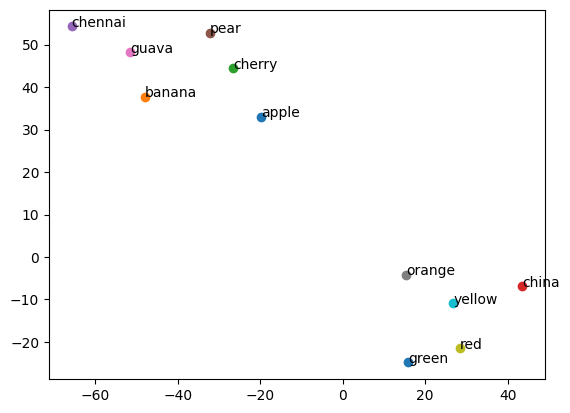

In [62]:
for i in range(len(x)):
  plt.scatter(x[i],y[i])
  plt.annotate(word1[i],(x[i],y[i]))
plt.show()

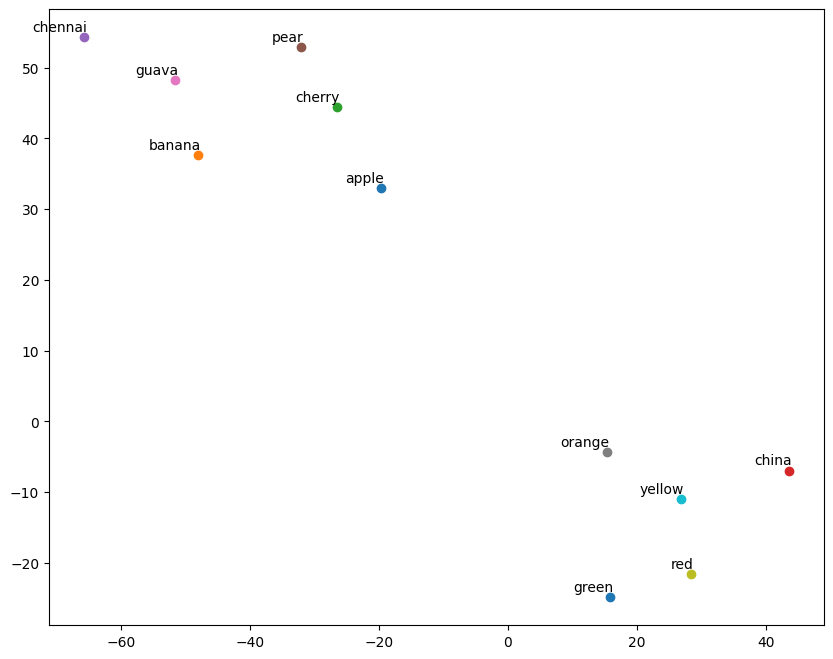

In [63]:
plt.figure(figsize=(10,8))
for i in range(len(x)):
  plt.scatter(x[i],y[i])
  plt.annotate(word1[i],(x[i],y[i]),
               xytext=(2,2),textcoords='offset points',
  ha='right',va='bottom')
plt.show()